In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2024-08-18 09:34:49--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-08-18 09:34:49--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-08-18 09:34:49--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Resolvi

In [2]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.7 MB/s eta 0:00:00


In [3]:
!pip install FinMind

  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 11.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 10.0 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.5.25-py3-none-any.whl size=24860 sha256=8d57940f5a07cc02fd63984201f321dd211bb098d1863fae7694a69cf9f7778e
  Stored in directory: /root/.cache/pip/wheels/d4/bd/c4/0dda911b5461ee856352cd8c9e16472229bb51c95e74b74c08
Successfully built ta


In [4]:
import pandas as pd
import numpy as np
import mplfinance as mpf
from talib.abstract import *

In [5]:
from FinMind.data import DataLoader
dl = DataLoader()
data = dl.taiwan_stock_daily(stock_id='2330',
                                 start_date='2022-07-01' ,
                                 end_date='2022-12-31')

2024-08-18 09:38:53.239 | INFO     | FinMind.data.finmind_api:get_data:125 - download TaiwanStockPrice, data_id: 2330


In [6]:
data.columns=[ i.lower() for i in data.columns ]
data.index = pd.DatetimeIndex(data['date'])
data.rename(columns = {'max':'high', 'min':'low','trading_volume':'volume'}, inplace = True)

In [7]:
# 繪製圖表
class chart():
    #建構式
    def __init__(self,K_line):
        self.K_line = K_line #K線資料
        self.axlist = [] #子圖列表
    #方法
    def TA(self,data,panel,type='',marker='.',color=''):
        ax = mpf.make_addplot(data, panel=panel, type=type, marker=marker, color=color)
        self.axlist.append(ax)

    def Show(self):
        color_set = mpf.make_marketcolors(up='red',down='green',
                                          edge='inherit',
                                          wick='inherit',
                                          volume='inherit',)
        style_set = mpf.make_mpf_style(marketcolors=color_set,
                                       figcolor='(0.82, 0.83, 0.85)',
                                       gridcolor='(0.82, 0.83, 0.85)',)
        mpf.plot(self.K_line,
                 type='hollow_and_filled',
                 style=style_set,
                 volume=True,
                 addplot=self.axlist,
                 update_width_config=dict(line_width=0.7,candle_width = 0.8),
                 figsize=(20, 8))

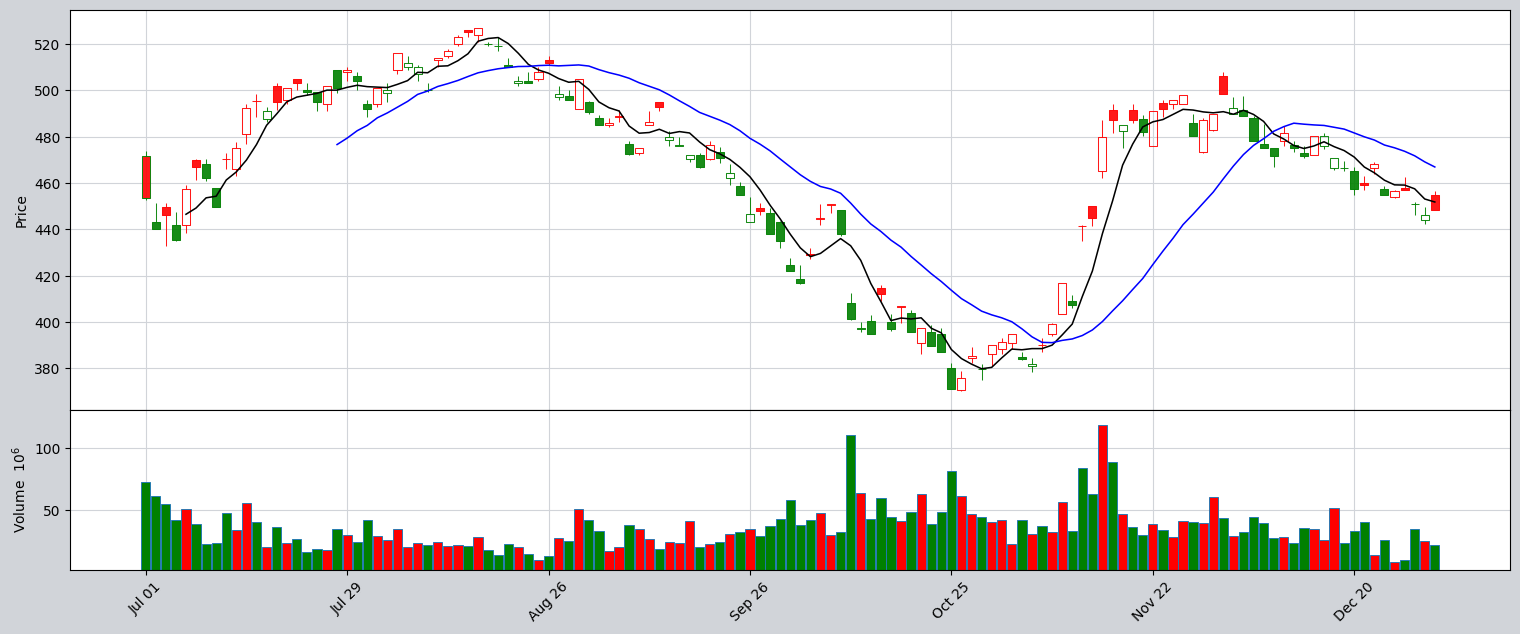

In [8]:
sma_5=SMA(data,timeperiod=5)
sma_20=SMA(data,timeperiod=20)

fin_chart = chart(data)
fin_chart.TA(sma_5,panel=0,type="line",color="black")
fin_chart.TA(sma_20,panel=0,type="line",color="blue")
fin_chart.Show()

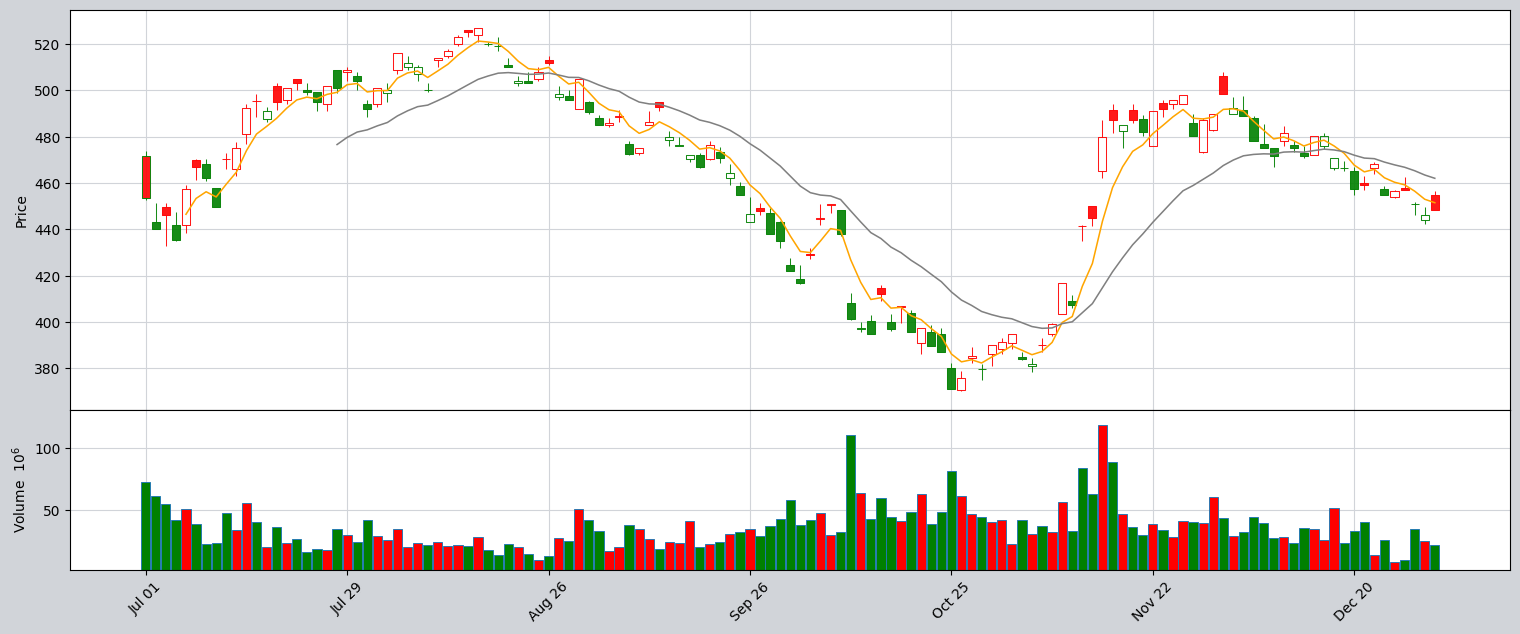

In [9]:
ema_5=EMA(data,timeperiod=5)
ema_20=EMA(data,timeperiod=20)

fin_chart = chart(data)
fin_chart.TA(ema_5,panel=0,type="line",color="orange")
fin_chart.TA(ema_20,panel=0,type="line",color="gray")
fin_chart.Show()

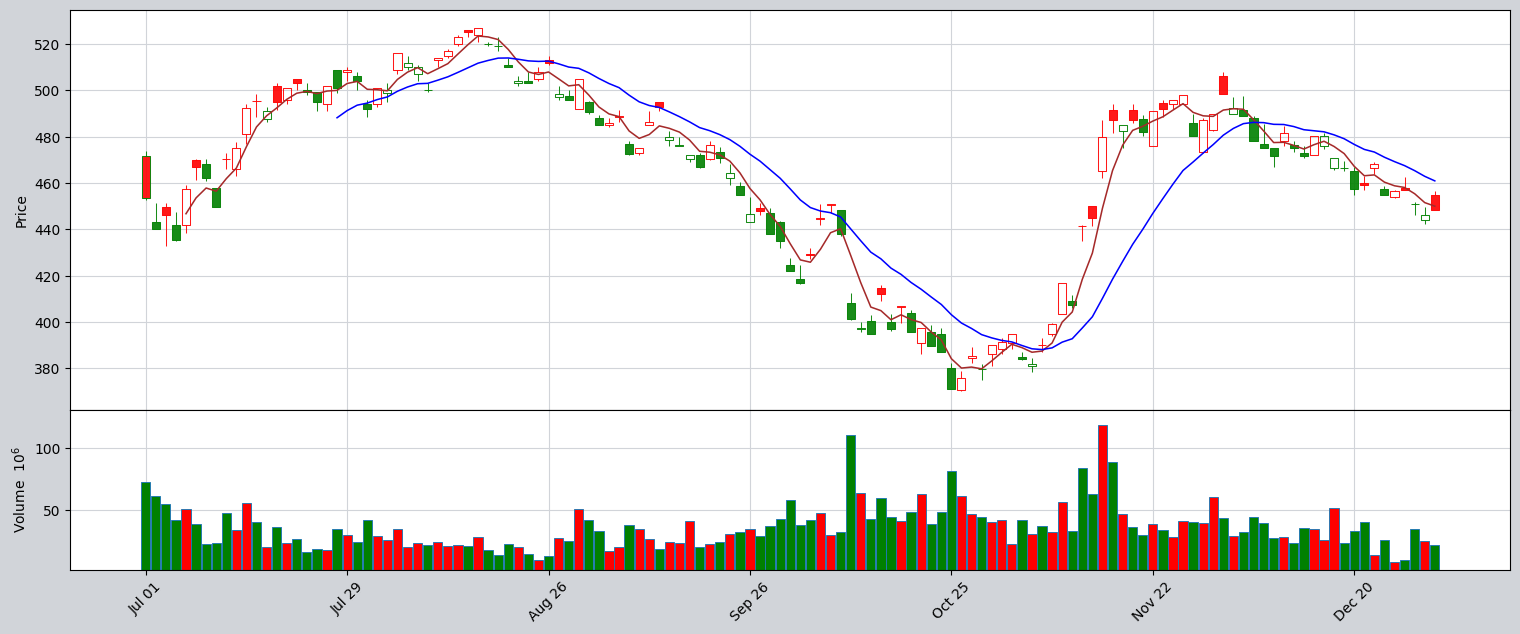

In [10]:
wma_5=WMA(data,timeperiod=5)
wma_20=WMA(data,timeperiod=20)

fin_chart = chart(data)
fin_chart.TA(wma_5,panel=0,type="line",color="Brown")
fin_chart.TA(wma_20,panel=0,type="line",color="blue")
fin_chart.Show()

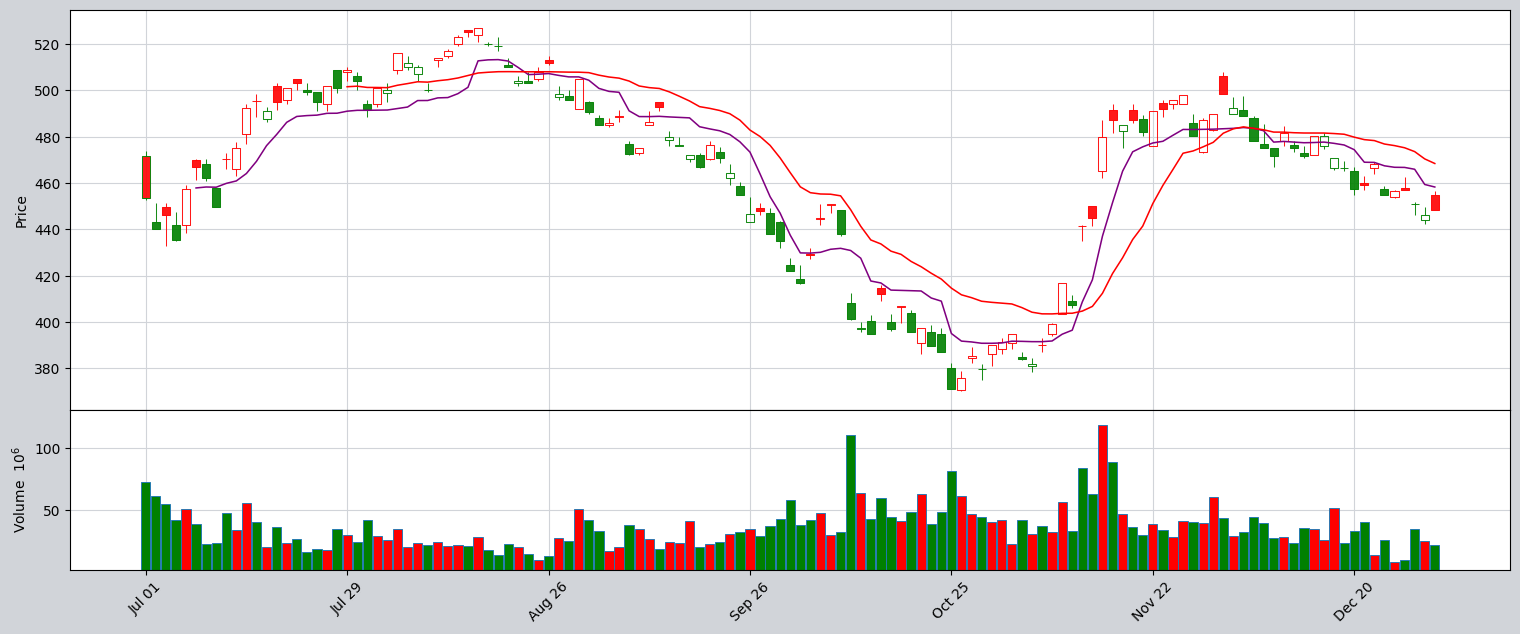

In [11]:
kama_5=KAMA(data,timeperiod=5)
kama_20=KAMA(data,timeperiod=20)

fin_chart = chart(data)
fin_chart.TA(kama_5,panel=0,type="line",color="purple")
fin_chart.TA(kama_20,panel=0,type="line",color="red")
fin_chart.Show()